In [4]:
import gym
import torch
import pandas as pd
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"   

from elegantrl.run import *
from neo_finrl.ccxt.data_fetch_ccxt import ccxt_fetch_data
from neo_finrl.ccxt.preprocess_ccxt import preprocess_btc

from neo_finrl.ccxt.env_btc_ccxt import BitcoinEnv
from elegantrl.agent import *

In [5]:
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/btc_create.csv'
# categorical feature
url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Feature-Selection-for-Machine-Learning-master/Data/merge_augmento_btc.csv'
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/code/Data/FUTURES/DOGEUSDT/DOGEUSDT-1m-data.csv'
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/doge_temp.csv'

In [6]:
# url = 'C:/Users/yosou/Documents/BooksWithCode/Binance/Deep Learning/LSTM_stock_price_predictor-master/doge_temp.csv'
# df = pd.read_csv(url, parse_dates=True).fillna(value=0)
# df =  df.drop(['Unnamed: 0'], axis=1)


df = pd.read_csv(url, parse_dates=True).fillna(value=0)
df = df[['time', 'open', 'high', 'low', 'close', 'twitter_investing_trading', 'twitter_scam_fraud',
       'bitcointalk_portfolio', 'bitcointalk_shilling', 'bitcointalk_bots',
       'bitcointalk_tax', 'reddit_leverage', 'reddit_bottom',
       'reddit_strategy', 'r']]

In [7]:
# '''data_fetch'''
# df = ccxt_fetch_data(start = '20200602 00:00:00', end = '20210609 00:00:00',
#                     pair = 'DOGE/USDT', period = '1m')
# df = ccxt_fetch_data(start = '20210101 00:00:00', end = '20210107 00:00:00',
#                     pair = 'BTC/USDT', period = '1m')

In [8]:
# df = df[362360:]
df

,time,open,high,low,close,twitter_investing_trading,twitter_scam_fraud,bitcointalk_portfolio,bitcointalk_shilling,bitcointalk_bots,bitcointalk_tax,reddit_leverage,reddit_bottom,reddit_strategy,r
0,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.002090
1,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,13.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.005912
2,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,10.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002457
3,2017-08-17 09:00:00,4360.00,4445.78,4360.00,4444.00,11.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.018925
4,2017-08-17 10:00:00,4441.10,4470.00,4399.81,4460.00,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.003594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,2021-04-20 12:00:00,56266.83,56290.31,55604.73,55801.14,30.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,-0.008311
32052,2021-04-20 13:00:00,55801.13,56320.55,55693.69,56317.99,33.0,3.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.009220
32053,2021-04-20 14:00:00,56318.00,56455.93,55200.00,55336.14,56.0,2.0,2.0,1.0,0.0,0.0,6.0,3.0,1.0,-0.017588
32054,2021-04-20 15:00:00,55336.14,55567.87,54649.58,55323.19,63.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,-0.000234


In [9]:
dff = df.set_index('time')
data_ary = preprocess_btc(dff)

                        open     high      low    close  \
time                                                      
2017-08-17 06:00:00  4330.29  4345.45  4309.37  4324.35   
2017-08-17 07:00:00  4316.62  4349.99  4287.41  4349.99   
2017-08-17 08:00:00  4333.32  4377.85  4333.32  4360.69   
2017-08-17 09:00:00  4360.00  4445.78  4360.00  4444.00   
2017-08-17 10:00:00  4441.10  4470.00  4399.81  4460.00   

                     twitter_investing_trading  twitter_scam_fraud  \
time                                                                 
2017-08-17 06:00:00                        4.0                 1.0   
2017-08-17 07:00:00                       13.0                 1.0   
2017-08-17 08:00:00                       10.0                 1.0   
2017-08-17 09:00:00                       11.0                 2.0   
2017-08-17 10:00:00                        7.0                 0.0   

                     bitcointalk_portfolio  bitcointalk_shilling  \
time                       

In [10]:
# data_ary = preprocess_btc(df)

In [11]:
data_ary.shape

(32056, 14)

In [12]:
gpu_id = 1
args = Arguments(agent=None, env=None, gpu_id=gpu_id)
args.agent = AgentDuelingDQN()

In [13]:
'''choose environment'''
args.env = BitcoinEnv(processed_ary = data_ary, if_train=True, if_test=False)
args.env_eval = BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=False)
args.net_dim = 2 ** 9 # change a default hyper-parameters
args.batch_size = 2 ** 8

In [11]:
train_and_evaluate(args)

| GPU id: 1, cwd: ./AgentDuelingDQN/BitcoinEnv_1
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC |  avgS  stdS
1   1.02e+03     -1.95 |
1   1.02e+03     -1.95 |   -1.95      0.00      -0.21      0.00 |  4808     0
1   2.05e+03      0.20 |
1   2.05e+03      0.20 |    0.20      0.00      -0.25      0.00 |  4808     0
1   3.07e+03      0.65 |
1   3.07e+03      0.65 |    0.65      0.00      -0.25      0.00 |  4808     0
1   4.10e+03      1.10 |
1   4.10e+03      1.10 |    1.10      0.00      -0.25      0.00 |  4808     0
1   5.12e+03      1.10 |    1.00      0.00      -0.24      0.00 |  4808     0
1   8.19e+03      2.58 |
1   8.19e+03      2.58 |    2.58      0.00      -0.19      0.00 |  4808     0
1   9.22e+03      2.58 |    1.05      0.00      -0.19      0.00 |  4808     0
1   1.13e+04      2.58 |    1.03      0.00      -0.17      0.00 |  4808     0
1   1.43e+04      2.58 |    0.82      0.00      -0.14      0.00 |  4808     0
1   1.74e+04      2.58 |    0

1   2.99e+05      3.90 |    0.24      0.00       0.00      0.00 |  4808     0
1   3.02e+05      3.90 |    0.22      0.00       0.00      0.00 |  4808     0
1   3.05e+05      3.90 |    0.41      0.00       0.01      0.00 |  4808     0
1   3.08e+05      3.90 |    0.97      0.00       0.01      0.00 |  4808     0
1   3.11e+05      3.90 |    0.17      0.00       0.00      0.00 |  4808     0
1   3.14e+05      3.90 |    1.03      0.00       0.01      0.00 |  4808     0
1   3.17e+05      3.90 |    0.15      0.00       0.01      0.00 |  4808     0
1   3.21e+05      3.90 |    3.02      0.00       0.01      0.00 |  4808     0
1   3.24e+05      3.90 |    0.19      0.00       0.01      0.00 |  4808     0
1   3.27e+05      3.90 |    1.04      0.00       0.01      0.00 |  4808     0
1   3.30e+05      3.90 |    0.15      0.00       0.00      0.00 |  4808     0
1   3.33e+05      3.90 |    0.33      0.00       0.00      0.00 |  4808     0
1   3.36e+05      3.90 |    0.32      0.00       0.00      0.00 

1   6.25e+05      3.90 |    0.27      0.00       0.00      0.00 |  4808     0
1   6.28e+05      3.90 |    0.20      0.00       0.00      0.00 |  4808     0
1   6.31e+05      3.90 |    0.15      0.00       0.00      0.00 |  4808     0
1   6.34e+05      3.90 |    0.34      0.00       0.00      0.00 |  4808     0
1   6.37e+05      3.90 |    0.29      0.00       0.00      0.00 |  4808     0
1   6.40e+05      3.90 |    0.21      0.00       0.00      0.00 |  4808     0
1   6.43e+05      3.90 |    0.24      0.00       0.01      0.00 |  4808     0
1   6.46e+05      3.90 |    0.11      0.00       0.00      0.00 |  4808     0
1   6.49e+05      3.90 |   -0.19      0.00       0.00      0.00 |  4808     0
1   6.52e+05      3.90 |    0.09      0.00       0.00      0.00 |  4808     0
1   6.55e+05      3.90 |    0.05      0.00       0.00      0.00 |  4808     0
1   6.58e+05      3.90 |   -0.20      0.00       0.00      0.00 |  4808     0
1   6.62e+05      3.90 |    0.07      0.00       0.00      0.00 

1   9.50e+05      3.90 |    0.23      0.00       0.01      0.00 |  4808     0
1   9.53e+05      3.90 |    0.27      0.00       0.00      0.00 |  4808     0
1   9.56e+05      3.90 |    0.24      0.00       0.00      0.00 |  4808     0
1   9.59e+05      3.90 |    0.15      0.00       0.00      0.00 |  4808     0
1   9.63e+05      3.90 |    0.22      0.00       0.00      0.00 |  4808     0
1   9.66e+05      3.90 |    0.17      0.00       0.01      0.00 |  4808     0
1   9.69e+05      3.90 |    0.18      0.00       0.00      0.00 |  4808     0
1   9.72e+05      3.90 |    0.19      0.00       0.01      0.00 |  4808     0
1   9.75e+05      3.90 |    0.26      0.00       0.00      0.00 |  4808     0
1   9.78e+05      3.90 |    0.18      0.00       0.00      0.00 |  4808     0
1   9.81e+05      3.90 |    0.37      0.00       0.01      0.00 |  4808     0
1   9.84e+05      3.90 |    0.10      0.00       0.01      0.00 |  4808     0
1   9.87e+05      3.90 |    0.32      0.00       0.01      0.00 

In [2]:
args = Arguments(agent=None, env=None, gpu_id=gpu_id)
args.agent = AgentDuelingDQN()
args.env = BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=True)
args.net_dim = 2 ** 9 # change a default hyper-parameters
args.batch_size = 2 ** 8
args.if_remove = False
args.cwd = './AgentDoubleDQN/BitcoinEnv_'+gpu_id
args.init_before_training()

NameError: name 'Arguments' is not defined

In [ ]:
prediction = args.env.trade_prediction(args, torch, df)

In [ ]:
args.env.backtest_plot(prediction, df)

FileNotFound when load_model: None
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (1

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2.....

State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1..... (16,)
State 2..... (16,)
State 1.....

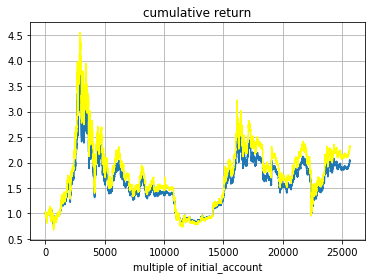

FileNotFoundError: [Errno 2] No such file or directory: 'None/cumulative_return.jpg'

<Figure size 432x288 with 0 Axes>

In [14]:
# Draw the graph
import matplotlib.pyplot as plt
%matplotlib inline

BitcoinEnv(processed_ary = data_ary, if_train=False, if_test=True)\
.draw_cumulative_return(self = args.env, args = args, _torch = torch)